In this section, I will take you through a Machine Learning project on predicting Employee Attrition prediction with Python programming language. I will start this task by importing the necessary Python libraries that we need for this task:



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline
from plotly.offline import init_notebook_mode
from plotly.subplots import make_subplots
import seaborn as sns
import datetime as dt
import warnings
import plotly.graph_objects as go
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns',None)
init_notebook_mode(connected=True)

Now let’s read the data and do some exploratory data analysis to understand this dataset properly:
Usually one of the first steps in data exploration is getting a rough idea of how the features are distributed among them. To do this, I’ll use the kdeplot function in the seaborn library in Python:

In [3]:
df=pd.read_csv('Employee-Attrition.csv')
df['EnvironmentSatisfaction']=df['EnvironmentSatisfaction'].replace(1,'Low')
df['EnvironmentSatisfaction']=df['EnvironmentSatisfaction'].replace(2,'Medium')
df['EnvironmentSatisfaction']=df['EnvironmentSatisfaction'].replace(3,'High')
df['EnvironmentSatisfaction']=df['EnvironmentSatisfaction'].replace(4,'Very High')
df['JobInvolvement']=df['JobInvolvement'].replace(1,'Low')
df['JobInvolvement']=df['JobInvolvement'].replace(2,'Medium')
df['JobInvolvement']=df['JobInvolvement'].replace(3,'High')
df['JobInvolvement']=df['JobInvolvement'].replace(4,'Very High')
df['JobSatisfaction']=df['JobSatisfaction'].replace(1,'Low')
df['JobSatisfaction']=df['JobSatisfaction'].replace(2,'Medium')
df['JobSatisfaction']=df['JobSatisfaction'].replace(3,'High')
df['JobSatisfaction']=df['JobSatisfaction'].replace(4,'Very High')
df['RelationshipSatisfaction']=df['RelationshipSatisfaction'].replace(1,'Low')
df['RelationshipSatisfaction']=df['RelationshipSatisfaction'].replace(2,'Medium')
df['RelationshipSatisfaction']=df['RelationshipSatisfaction'].replace(3,'High')
df['RelationshipSatisfaction']=df['RelationshipSatisfaction'].replace(4,'Very High')
df['PerformanceRating']=df['PerformanceRating'].replace(1,'Low')
df['PerformanceRating']=df['PerformanceRating'].replace(2,'Good')
df['PerformanceRating']=df['PerformanceRating'].replace(3,'Excellent')
df['PerformanceRating']=df['PerformanceRating'].replace(4,'Outstanding')
df['WorkLifeBalance']=df['WorkLifeBalance'].replace(1,'Bad')
df['WorkLifeBalance']=df['WorkLifeBalance'].replace(2,'Good')
df['WorkLifeBalance']=df['WorkLifeBalance'].replace(3,'Better')
df['WorkLifeBalance']=df['WorkLifeBalance'].replace(4,'Better')
df['Education']=df['Education'].replace(1,'Below College')
df['Education']=df['Education'].replace(2,'College')
df['Education']=df['Education'].replace(3,'Bachelor')
df['Education']=df['Education'].replace(4,'Master')
df['Education']=df['Education'].replace(5,'Doctor')

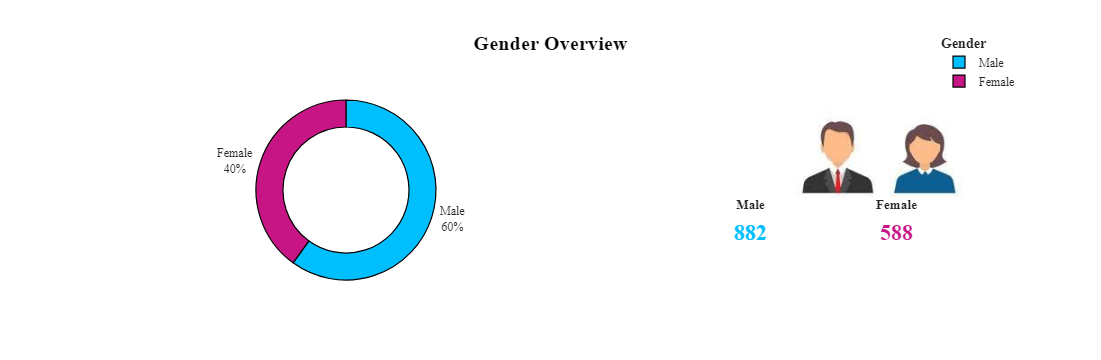

In [4]:
att1=df.groupby(['Gender'],as_index=False)['Age'].count()
att1.rename(columns={'Age':'Count'},inplace=True)
fig = make_subplots(rows=1, cols=2, specs=[[{"type": "pie"},{"type": "pie"}]],subplot_titles=('',''))
fig.add_trace(go.Pie(values=att1['Count'],labels=['Female','Male'],hole=0.7,marker_colors=['MediumVioletRed','DeepSkyBlue']),row=1,col=1)
fig.add_layout_image(
    dict(
        source="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRZORjtvFSOGSPFqmbO5iUhCQvAmEaVagAfTxL-AWHKteG2H2vwzIaa2Ugc-8YClYZWQ7s&usqp=CAU",
        xref="paper",
        yref="paper",
        x=0.94, y=0.182,
        sizex=0.35, sizey=1,
        xanchor="right", yanchor="bottom", sizing= "contain",
    )
)
fig.update_traces(textposition='outside', textinfo='percent+label')
fig.update_layout(title_x=0.5,template='simple_white',showlegend=True,legend_title_text="<b>Gender",title_text='<b style="color:black; font-size:120%;">Gender Overview',font_family="Times New Roman",title_font_family="Times New Roman")
fig.update_traces(marker=dict(line=dict(color='#000000', width=1.2)))
fig.update_layout(title_x=0.5,legend=dict(orientation='v',yanchor='bottom',y=1.02,xanchor='right',x=1))
fig.add_annotation(x=0.715,
                   y=0.18,
                   text='<b style="font-size:1.2vw" >Male</b><br><br><b style="color:DeepSkyBlue; font-size:2vw">882</b>',
                   showarrow=False,
                   xref="paper",
                   yref="paper",
                  )
fig.add_annotation(x=0.89,
                   y=0.18,
                   text='<b style="font-size:1.2vw" >Female</b><br><br><b style="color:MediumVioletRed; font-size:2vw">588</b>',
                   showarrow=False,
                   xref="paper",
                   yref="paper",
                  )
fig.show()



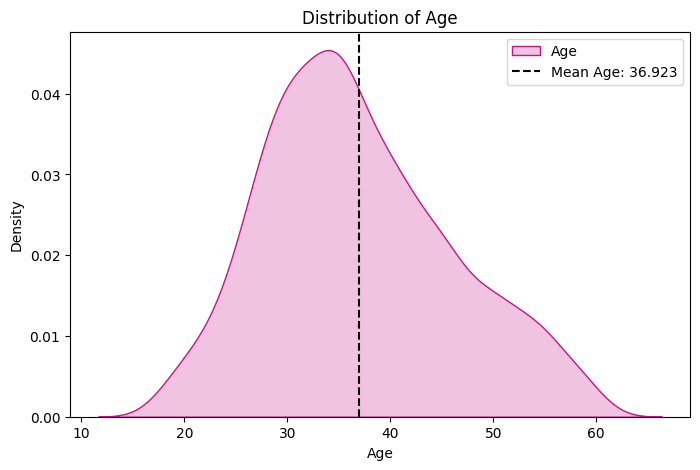

In [5]:
plt.figure(figsize=(8,5))
sns.kdeplot(x=df['Age'],color='MediumVioletRed',shade=True,label='Age')
plt.axvline(x=df['Age'].mean(),color='k',linestyle ="--",label='Mean Age: 36.923')
plt.legend()
plt.title('Distribution of Age')
plt.show()

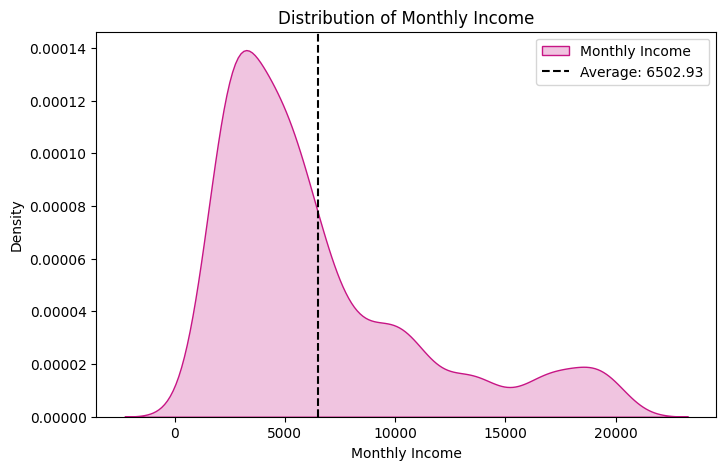

In [6]:
plt.figure(figsize=(8,5))
sns.kdeplot(x=df['MonthlyIncome'],color='MediumVioletRed',shade=True,label='Monthly Income')
plt.axvline(x=df['MonthlyIncome'].mean(),color='k',linestyle ="--",label='Average: 6502.93')
plt.xlabel('Monthly Income')
plt.legend()
plt.title('Distribution of Monthly Income')
plt.show()

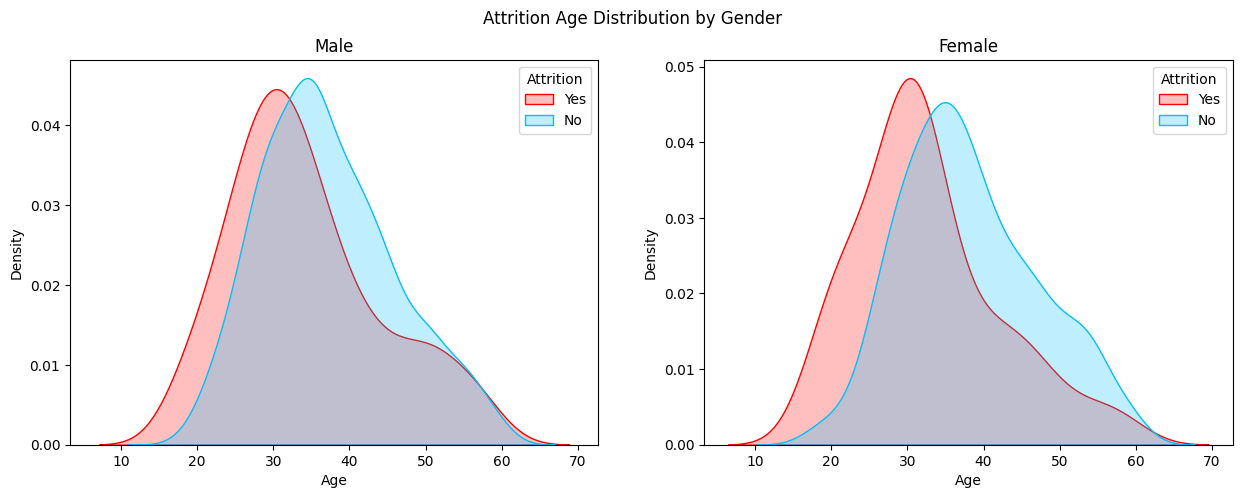

In [7]:
fig, axes = plt.subplots(1, 2, sharex=True, figsize=(15,5))
fig.suptitle('Attrition Age Distribution by Gender')
sns.kdeplot(ax=axes[0],x=df[(df['Gender']=='Male')&(df['Attrition']=='Yes')]['Age'], color='r', shade=True, label='Yes')
sns.kdeplot(ax=axes[0],x=df[(df['Gender']=='Male')&(df['Attrition']=='No')]['Age'], color='#00BFFF', shade=True, label='No')
axes[0].set_title('Male')
axes[0].legend(title='Attrition')
sns.kdeplot(ax=axes[1],x=df[(df['Gender']=='Female')&(df['Attrition']=='Yes')]['Age'], color='r', shade=True, label='Yes')
sns.kdeplot(ax=axes[1],x=df[(df['Gender']=='Female')&(df['Attrition']=='No')]['Age'], color='#00BFFF', shade=True, label='No')
axes[1].set_title('Female')
axes[1].legend(title='Attrition')
plt.show()

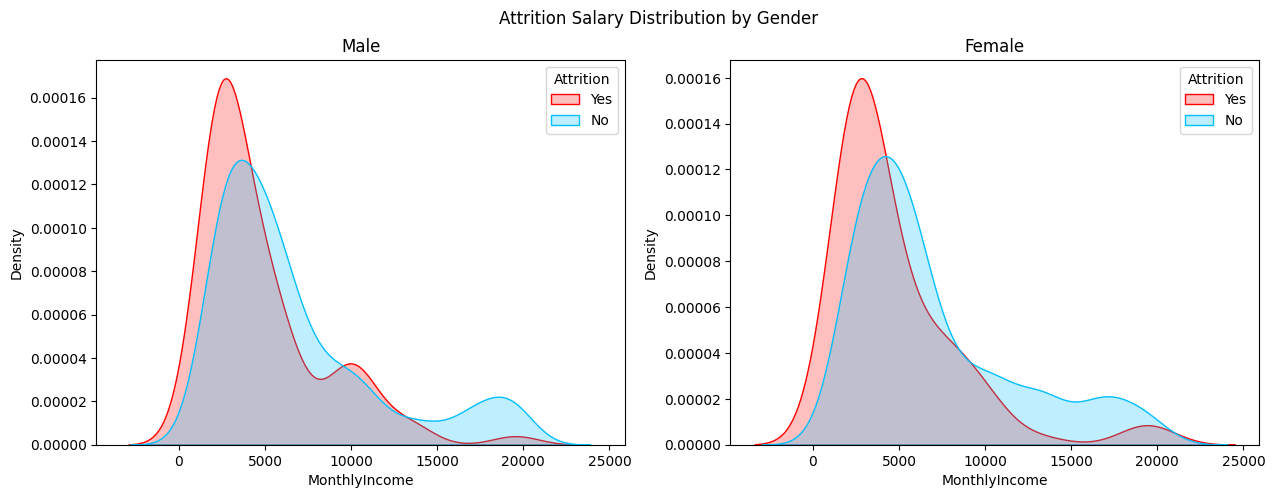

In [8]:
fig, axes = plt.subplots(1, 2, sharex=True, figsize=(15,5))
fig.suptitle('Attrition Salary Distribution by Gender')
sns.kdeplot(ax=axes[0],x=df[(df['Gender']=='Male')&(df['Attrition']=='Yes')]['MonthlyIncome'], color='r', shade=True, label='Yes')
sns.kdeplot(ax=axes[0],x=df[(df['Gender']=='Male')&(df['Attrition']=='No')]['MonthlyIncome'], color='#00BFFF', shade=True, label='No')
axes[0].set_title('Male')
axes[0].legend(title='Attrition')
sns.kdeplot(ax=axes[1],x=df[(df['Gender']=='Female')&(df['Attrition']=='Yes')]['MonthlyIncome'], color='r', shade=True, label='Yes')
sns.kdeplot(ax=axes[1],x=df[(df['Gender']=='Female')&(df['Attrition']=='No')]['MonthlyIncome'], color='#00BFFF', shade=True, label='No')
axes[1].set_title('Female')
axes[1].legend(title='Attrition')
plt.show()


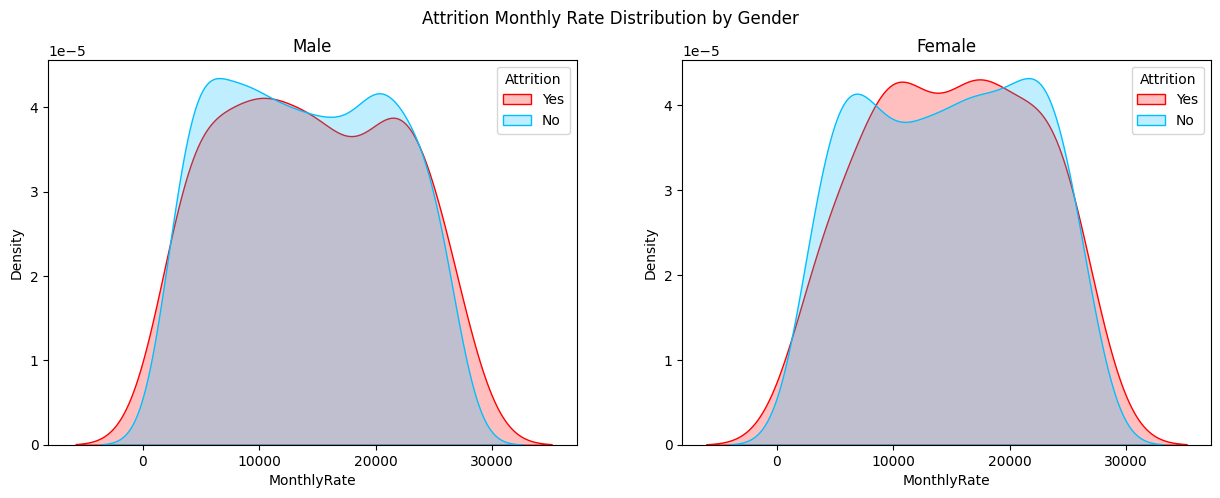

In [9]:
fig, axes = plt.subplots(1, 2, sharex=True, figsize=(15,5))
fig.suptitle('Attrition Monthly Rate Distribution by Gender')
sns.kdeplot(ax=axes[0],x=df[(df['Gender']=='Male')&(df['Attrition']=='Yes')]['MonthlyRate'], color='r', shade=True, label='Yes')
sns.kdeplot(ax=axes[0],x=df[(df['Gender']=='Male')&(df['Attrition']=='No')]['MonthlyRate'], color='#00BFFF', shade=True, label='No')
axes[0].set_title('Male')
axes[0].legend(title='Attrition')
sns.kdeplot(ax=axes[1],x=df[(df['Gender']=='Female')&(df['Attrition']=='Yes')]['MonthlyRate'], color='r', shade=True, label='Yes')
sns.kdeplot(ax=axes[1],x=df[(df['Gender']=='Female')&(df['Attrition']=='No')]['MonthlyRate'], color='#00BFFF', shade=True, label='No')
axes[1].set_title('Female')
axes[1].legend(title='Attrition')
plt.show()

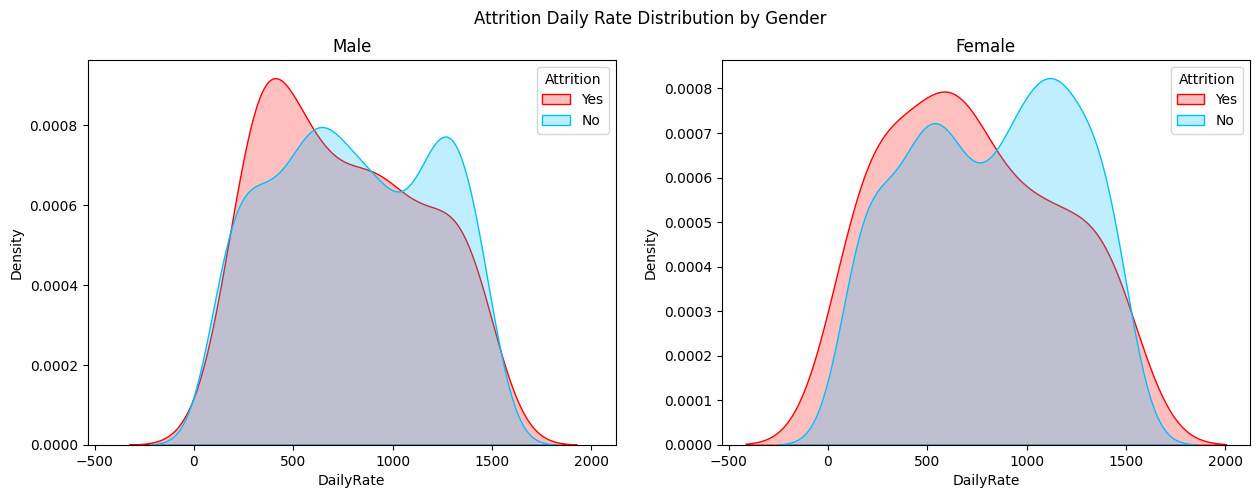

In [10]:
fig, axes = plt.subplots(1, 2, sharex=True, figsize=(15,5))
fig.suptitle('Attrition Daily Rate Distribution by Gender')
sns.kdeplot(ax=axes[0],x=df[(df['Gender']=='Male')&(df['Attrition']=='Yes')]['DailyRate'], color='r', shade=True, label='Yes')
sns.kdeplot(ax=axes[0],x=df[(df['Gender']=='Male')&(df['Attrition']=='No')]['DailyRate'], color='#00BFFF', shade=True, label='No')
axes[0].set_title('Male')
axes[0].legend(title='Attrition')
sns.kdeplot(ax=axes[1],x=df[(df['Gender']=='Female')&(df['Attrition']=='Yes')]['DailyRate'], color='r', shade=True, label='Yes')
sns.kdeplot(ax=axes[1],x=df[(df['Gender']=='Female')&(df['Attrition']=='No')]['DailyRate'], color='#00BFFF', shade=True, label='No')
axes[1].set_title('Female')
axes[1].legend(title='Attrition')
plt.show()


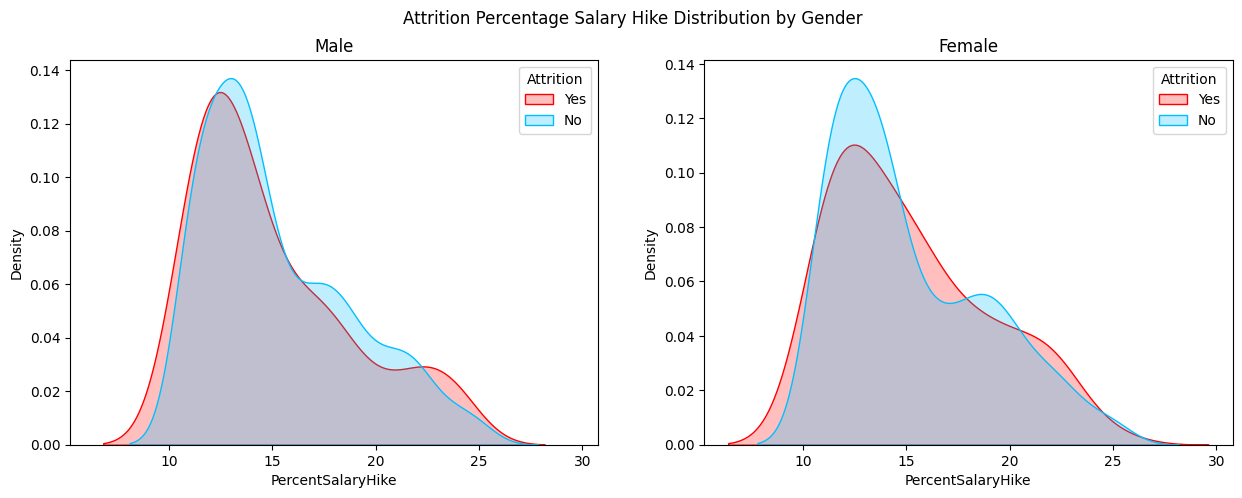

In [11]:
fig, axes = plt.subplots(1, 2, sharex=True, figsize=(15,5))
fig.suptitle('Attrition Percentage Salary Hike Distribution by Gender')
sns.kdeplot(ax=axes[0],x=df[(df['Gender']=='Male')&(df['Attrition']=='Yes')]['PercentSalaryHike'], color='r', shade=True, label='Yes')
sns.kdeplot(ax=axes[0],x=df[(df['Gender']=='Male')&(df['Attrition']=='No')]['PercentSalaryHike'], color='#00BFFF', shade=True, label='No')
axes[0].set_title('Male')
axes[0].legend(title='Attrition')
sns.kdeplot(ax=axes[1],x=df[(df['Gender']=='Female')&(df['Attrition']=='Yes')]['PercentSalaryHike'], color='r', shade=True, label='Yes')
sns.kdeplot(ax=axes[1],x=df[(df['Gender']=='Female')&(df['Attrition']=='No')]['PercentSalaryHike'], color='#00BFFF', shade=True, label='No')
axes[1].set_title('Female')
axes[1].legend(title='Attrition')
plt.show()

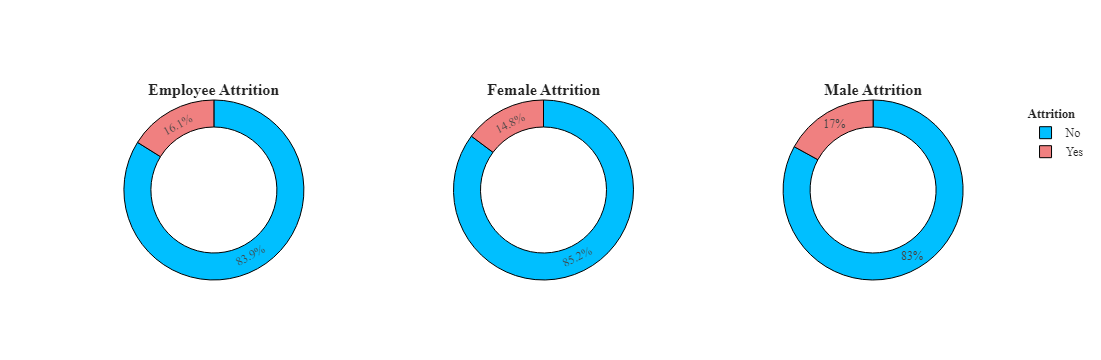

In [12]:
att1=df.groupby('Attrition',as_index=False)['Age'].count()
att1['Count']=att1['Age']
att1.drop('Age',axis=1,inplace=True)
att2=df.groupby(['Gender','Attrition'],as_index=False)['Age'].count()
att2['Count']=att2['Age']
att2.drop('Age',axis=1,inplace=True)
fig=go.Figure()
fig=make_subplots(rows=1,cols=3)
fig = make_subplots(rows=1, cols=3, specs=[[{"type": "pie"}, {"type": "pie"}, {"type": "pie"}]],subplot_titles=('<b>Employee Attrition', '<b>Female Attrition','<b>Male Attrition'))



fig.add_trace(go.Pie(values=att1['Count'],labels=att1['Attrition'],hole=0.7,marker_colors=['DeepSkyBlue','LightCoral'],name='Employee Attrition',showlegend=False),row=1,col=1)
fig.add_trace(go.Pie(values=att2[(att2['Gender']=='Female')]['Count'],labels=att2[(att2['Gender']=='Female')]['Attrition'],hole=0.7,marker_colors=['DeepSkyBlue','LightCoral'],name='Female Attrition',showlegend=False),row=1,col=2)
fig.add_trace(go.Pie(values=att2[(att2['Gender']=='Male')]['Count'],labels=att2[(att2['Gender']=='Male')]['Attrition'],hole=0.7,marker_colors=['DeepSkyBlue','LightCoral'],name='Male Attrition',showlegend=True),row=1,col=3)
fig.update_layout(title_x=0,template='simple_white',showlegend=True,legend_title_text="<b style=\"font-size:90%;\">Attrition",title_text='<b style="color:black; font-size:120%;"></b>',font_family="Times New Roman",title_font_family="Times New Roman")
fig.update_traces(marker=dict(line=dict(color='#000000', width=1)))


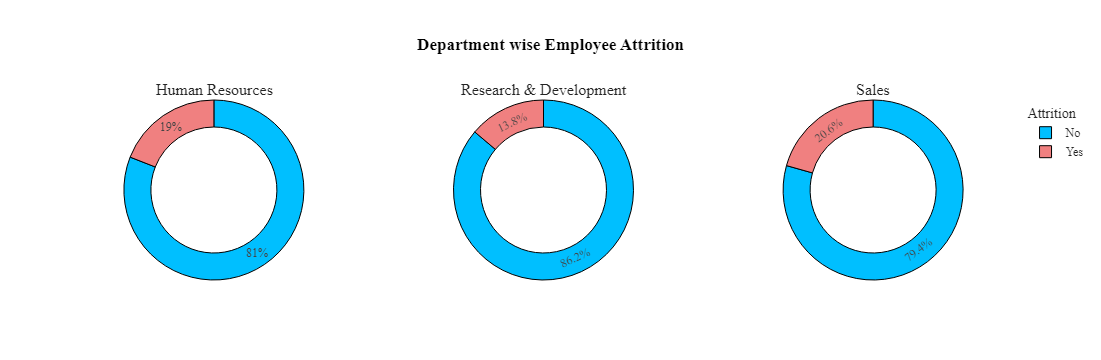

In [13]:
k=df.groupby(['Department','Attrition'],as_index=False)['Age'].count()
k.rename(columns={'Age':'Count'},inplace=True)
fig=go.Figure()
fig=make_subplots(rows=1,cols=3)
fig = make_subplots(rows=1, cols=3, specs=[[{"type": "pie"}, {"type": "pie"}, {"type": "pie"}]],subplot_titles=('Human Resources', 'Research & Development','Sales'))

fig.add_trace(go.Pie(values=k[k['Department']=='Human Resources']['Count'],labels=k[k['Department']=='Human Resources']['Attrition'],hole=0.7,marker_colors=['DeepSkyBlue','LightCoral'],name='Human Resources',showlegend=False),row=1,col=1)
fig.add_trace(go.Pie(values=k[k['Department']=='Research & Development']['Count'],labels=k[k['Department']=='Research & Development']['Attrition'],hole=0.7,marker_colors=['DeepSkyBlue','LightCoral'],name='Research & Development',showlegend=False),row=1,col=2)
fig.add_trace(go.Pie(values=k[k['Department']=='Sales']['Count'],labels=k[k['Department']=='Sales']['Attrition'],hole=0.7,marker_colors=['DeepSkyBlue','LightCoral'],name='Sales',showlegend=True),row=1,col=3)

fig.update_layout(title_x=0.5,template='simple_white',showlegend=True,legend_title_text="Attrition",title_text='<b style="color:black; font-size:100%;">Department wise Employee Attrition',font_family="Times New Roman",title_font_family="Times New Roman")
fig.update_traces(marker=dict(line=dict(color='#000000', width=1)))


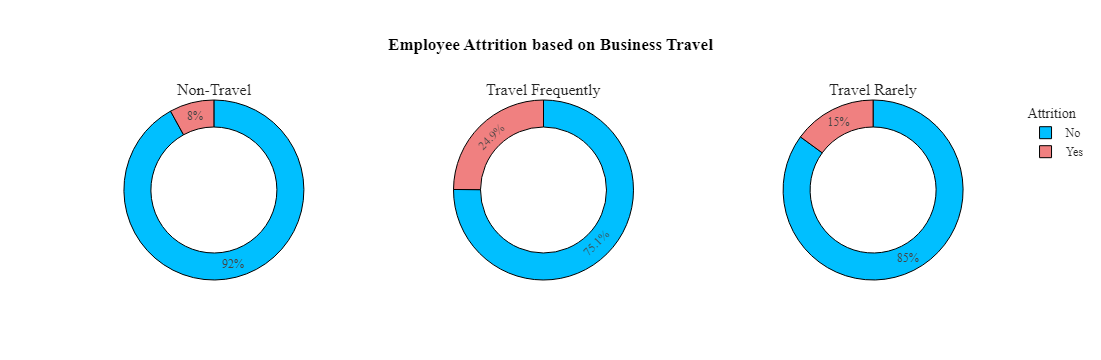

In [14]:
bus=df.groupby(['BusinessTravel','Attrition'],as_index=False)['Age'].count()
bus.rename(columns={'Age':'Count'},inplace=True)
fig=go.Figure()
fig=make_subplots(rows=1,cols=3)
fig = make_subplots(rows=1, cols=3, specs=[[{"type": "pie"}, {"type": "pie"}, {"type": "pie"}]],subplot_titles=('Non-Travel', 'Travel Frequently','Travel Rarely'))

fig.add_trace(go.Pie(values=bus[bus['BusinessTravel']=='Non-Travel']['Count'],labels=bus[bus['BusinessTravel']=='Non-Travel']['Attrition'],hole=0.7,marker_colors=['DeepSkyBlue','LightCoral'],name='Non-Travel',showlegend=False),row=1,col=1)
fig.add_trace(go.Pie(values=bus[bus['BusinessTravel']=='Travel_Frequently']['Count'],labels=bus[bus['BusinessTravel']=='Travel_Frequently']['Attrition'],hole=0.7,marker_colors=['DeepSkyBlue','LightCoral'],name='Travel Frequently',showlegend=False),row=1,col=2)
fig.add_trace(go.Pie(values=bus[bus['BusinessTravel']=='Travel_Rarely']['Count'],labels=bus[bus['BusinessTravel']=='Travel_Rarely']['Attrition'],hole=0.7,marker_colors=['DeepSkyBlue','LightCoral'],name='Travel Rarely',showlegend=True),row=1,col=3)

fig.update_layout(title_x=0.5,template='simple_white',showlegend=True,legend_title_text="Attrition",title_text='<b style="color:black; font-size:100%;">Employee Attrition based on Business Travel',font_family="Times New Roman",title_font_family="Times New Roman")
fig.update_traces(marker=dict(line=dict(color='#000000', width=1)))

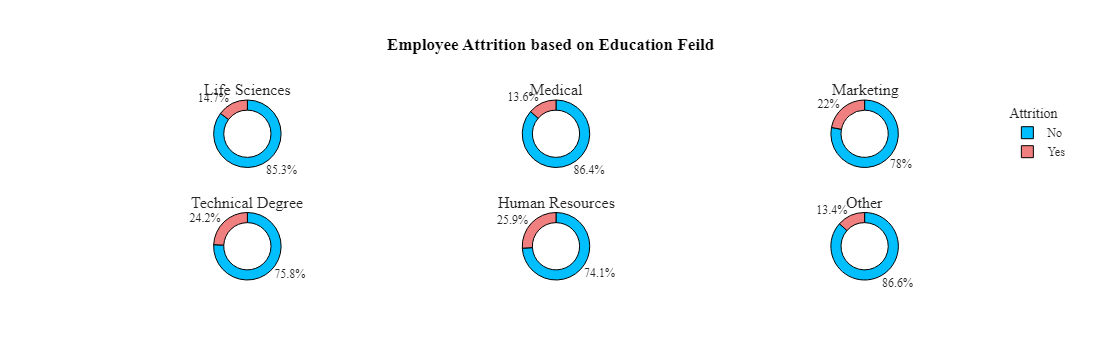

In [15]:
bus=df.groupby(['EducationField','Attrition'],as_index=False)['Age'].count()
bus.rename(columns={'Age':'Count'},inplace=True)
fig=go.Figure()
fig = make_subplots(rows=2, cols=3, specs=[[{"type": "pie"}, {"type": "pie"}, {"type": "pie"}],[{"type": "pie"}, {"type": "pie"}, {"type": "pie"}]],subplot_titles=('Life Sciences', 'Medical','Marketing','Technical Degree','Human Resources','Other'))

fig.add_trace(go.Pie(values=bus[bus['EducationField']=='Life Sciences']['Count'],labels=bus[bus['EducationField']=='Life Sciences']['Attrition'],hole=0.7,marker_colors=['DeepSkyBlue','LightCoral'],name='Life Sciences',showlegend=False),row=1,col=1)
fig.add_trace(go.Pie(values=bus[bus['EducationField']=='Medical']['Count'],labels=bus[bus['EducationField']=='Medical']['Attrition'],hole=0.7,marker_colors=['DeepSkyBlue','LightCoral'],name='Medical',showlegend=False),row=1,col=2)
fig.add_trace(go.Pie(values=bus[bus['EducationField']=='Marketing']['Count'],labels=bus[bus['EducationField']=='Marketing']['Attrition'],hole=0.7,marker_colors=['DeepSkyBlue','LightCoral'],name='Marketing',showlegend=True),row=1,col=3)
fig.add_trace(go.Pie(values=bus[bus['EducationField']=='Technical Degree']['Count'],labels=bus[bus['EducationField']=='Technical Degree']['Attrition'],hole=0.7,marker_colors=['DeepSkyBlue','LightCoral'],name='Technical Degree',showlegend=False),row=2,col=1)
fig.add_trace(go.Pie(values=bus[bus['EducationField']=='Human Resources']['Count'],labels=bus[bus['EducationField']=='Human Resources']['Attrition'],hole=0.7,marker_colors=['DeepSkyBlue','LightCoral'],name='Human Resources',showlegend=False),row=2,col=2)
fig.add_trace(go.Pie(values=bus[bus['EducationField']=='Other']['Count'],labels=bus[bus['EducationField']=='Other']['Attrition'],hole=0.7,marker_colors=['DeepSkyBlue','LightCoral'],name='Other',showlegend=False),row=2,col=3)

fig.update_layout(title_x=0.5,template='simple_white',showlegend=True,legend_title_text="Attrition",title_text='<b style="color:black; font-size:100%;">Employee Attrition based on Education Feild',font_family="Times New Roman",title_font_family="Times New Roman")
fig.update_traces(marker=dict(line=dict(color='#000000', width=1)))


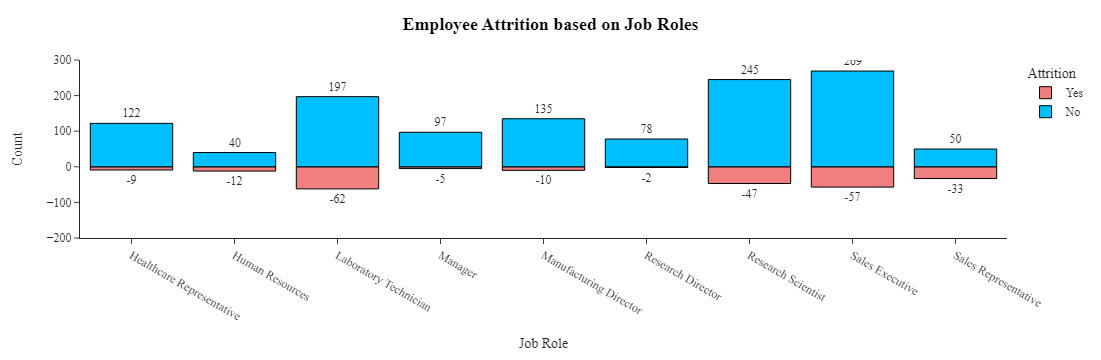

In [16]:
k=df.groupby(['JobRole','Attrition'],as_index=False)['Age'].count()
a=k[k['Attrition']=='Yes']
b=k[k['Attrition']=='No']
a['Age']=a['Age'].apply(lambda x: -x)
k=pd.concat([a,b],ignore_index=True)
k['Count']=k['Age']
k.rename(columns={'JobRole':'Job Role'},inplace=True)
fig=px.bar(k,x='Job Role',y='Count',color='Attrition',template='simple_white',text='Count',color_discrete_sequence=['LightCoral','DeepSkyBlue'])
fig.update_yaxes(range=[-200,300])
fig.update_traces(marker=dict(line=dict(color='#000000', width=1)),textposition = "outside")
fig.update_xaxes(visible=True)
fig.update_yaxes(visible=True)
fig.update_layout(title_x=0.5,template='simple_white',showlegend=True,title_text='<b style="color:black; font-size:105%;">Employee Attrition based on Job Roles</b>',font_family="Times New Roman",title_font_family="Times New Roman")
fig.show()


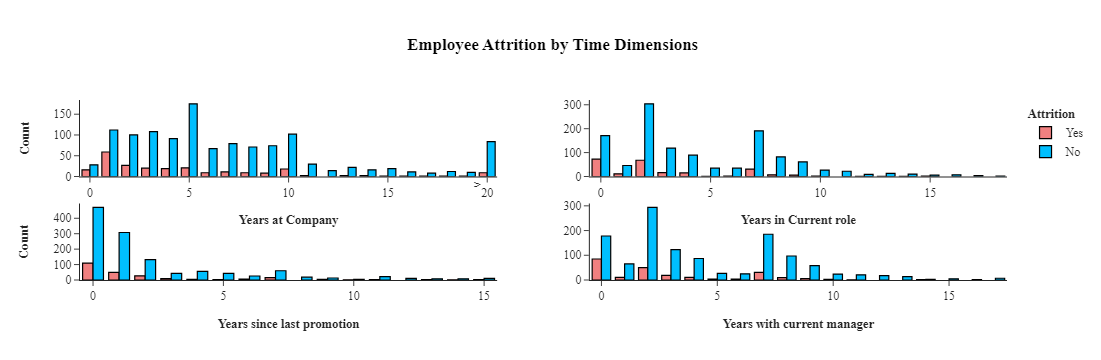

In [17]:
fig=go.Figure()
fig=make_subplots(rows=2,cols=2)
years1=df.groupby(['YearsAtCompany','Attrition'],as_index=False)['Age'].count()
years1['Count']=years1['Age']
years1.drop(columns='Age',axis=1,inplace=True)
years1['YearsAtCompany']=years1['YearsAtCompany'].apply(lambda x: 20 if x>19 else x)
years1=years1.groupby(['YearsAtCompany','Attrition'],as_index=False)['Count'].sum()
years2=df.groupby(['YearsInCurrentRole','Attrition'],as_index=False)['Age'].count()
years2['Count']=years2['Age']
years2.drop(columns='Age',axis=1,inplace=True)
years3=df.groupby(['YearsSinceLastPromotion','Attrition'],as_index=False)['Age'].count()
years3['Count']=years3['Age']
years3.drop(columns='Age',axis=1,inplace=True)
years4=df.groupby(['YearsWithCurrManager','Attrition'],as_index=False)['Age'].count()
years4['Count']=years4['Age']
years4.drop(columns='Age',axis=1,inplace=True)

fig.add_trace(go.Bar(x=years1[years1['Attrition']=='Yes']['YearsAtCompany'], y=years1[years1['Attrition']=='Yes']['Count'],name='Yes',marker_color='LightCoral',showlegend=False),row=1,col=1)
fig.add_trace(go.Bar(x=years1[years1['Attrition']=='No']['YearsAtCompany'], y=years1[years1['Attrition']=='No']['Count'],name='No',marker_color='DeepSkyBlue',showlegend=False),row=1,col=1)

fig.add_trace(go.Bar(x=years2[years2['Attrition']=='Yes']['YearsInCurrentRole'], y=years2[years2['Attrition']=='Yes']['Count'],name='Yes',marker_color='LightCoral',showlegend=True),row=1,col=2)
fig.add_trace(go.Bar(x=years2[years2['Attrition']=='No']['YearsInCurrentRole'], y=years2[years2['Attrition']=='No']['Count'],name='No',marker_color='DeepSkyBlue',showlegend=True),row=1,col=2)
fig.add_trace(go.Bar(x=years3[years3['Attrition']=='Yes']['YearsSinceLastPromotion'], y=years3[years3['Attrition']=='Yes']['Count'],name='Yes',marker_color='LightCoral',showlegend=False),row=2,col=1)
fig.add_trace(go.Bar(x=years3[years3['Attrition']=='No']['YearsSinceLastPromotion'], y=years3[years3['Attrition']=='No']['Count'],name='No',marker_color='DeepSkyBlue',showlegend=False),row=2,col=1)
fig.add_trace(go.Bar(x=years4[years4['Attrition']=='Yes']['YearsWithCurrManager'], y=years4[years4['Attrition']=='Yes']['Count'],name='Yes',marker_color='LightCoral',showlegend=False),row=2,col=2)
fig.add_trace(go.Bar(x=years4[years4['Attrition']=='No']['YearsWithCurrManager'], y=years4[years4['Attrition']=='No']['Count'],name='No',marker_color='DeepSkyBlue',showlegend=False),row=2,col=2)
fig.update_xaxes(title_text="<b style=\"font-size:90%;\">Years at Company", title_font_family="Times New Roman",row=1, col=1)
fig.update_xaxes(title_text="<b style=\"font-size:90%;\">Years in Current role",title_font_family="Times New Roman", row=1, col=2)
fig.update_xaxes(title_text="<b style=\"font-size:90%;\">Years since last promotion", title_font_family="Times New Roman",row=2, col=1)
fig.update_xaxes(title_text="<b style=\"font-size:90%;\">Years with current manager", title_font_family="Times New Roman",row=2, col=2)
fig.update_layout(title_x=0.5,template='simple_white',showlegend=True,legend_title_text="<b style=\"font-size:90%;\">Attrition",title_text='<b style="color:black; font-size:100%;"> Employee Attrition by Time Dimensions</b>',font_family="Times New Roman",title_font_family="Times New Roman")
fig.update_yaxes(title_text="<b style=\"font-size:90%;\">Count", title_font_family="Times New Roman",row=1, col=1)
fig.update_yaxes(title_text="<b style=\"font-size:90%;\">Count", title_font_family="Times New Roman",row=2, col=1)
fig.update_traces(marker=dict(line=dict(color='#000000', width=1.2)))

fig.add_annotation(x=0.428,
                   y=0.528,
                   text=">",
                   showarrow=False,
                   xref="paper",
                   yref="paper",)
fig.show()


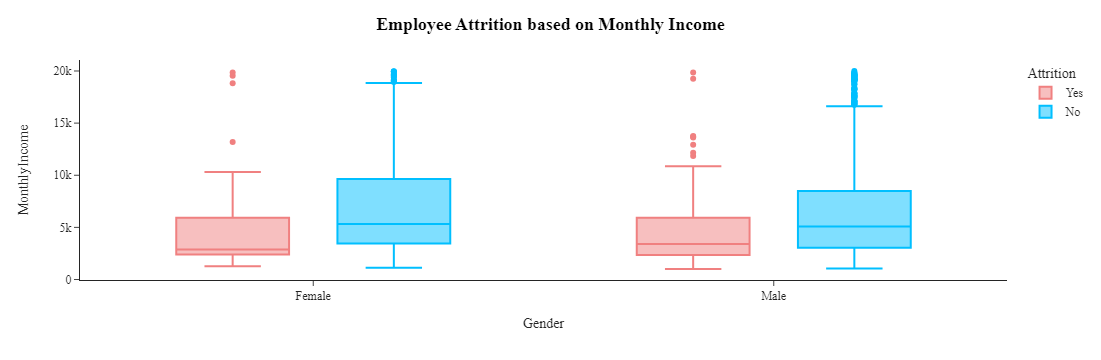

In [18]:
fig=px.box(df,x='Gender',y='MonthlyIncome',color='Attrition',template='simple_white',color_discrete_sequence=['LightCoral','DeepSkyBlue'])
fig.update_xaxes(visible=True)
fig.update_yaxes(visible=True)
fig.update_layout(title_x=0.5,template='simple_white',showlegend=True,title_text='<b style="color:black; font-size:105%;">Employee Attrition based on Monthly Income</b>',font_family="Times New Roman",title_font_family="Times New Roman")
fig.show()

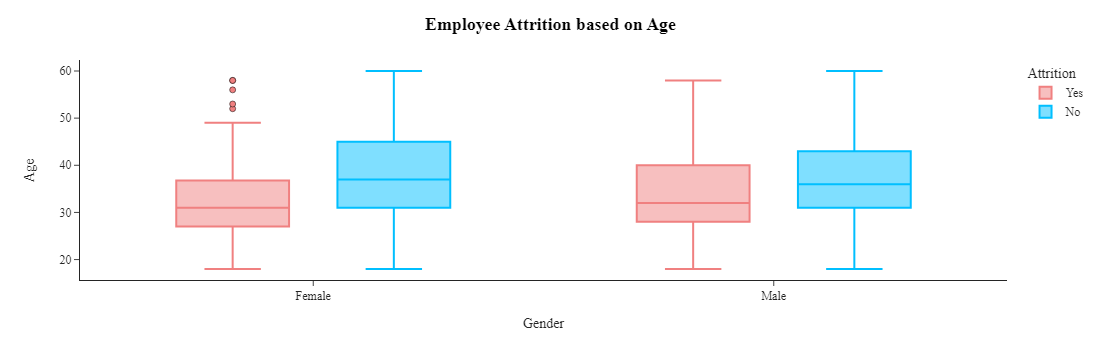

In [19]:
fig=px.box(df,x='Gender',y='Age',color='Attrition',template='simple_white',color_discrete_sequence=['LightCoral','DeepSkyBlue'])
fig.update_traces(marker=dict(line=dict(color='#000000', width=0.5)))
fig.update_xaxes(visible=True)
fig.update_yaxes(visible=True)
fig.update_layout(title_x=0.5,template='simple_white',showlegend=True,title_text='<b style="color:black; font-size:105%;">Employee Attrition based on Age</b>',font_family="Times New Roman",title_font_family="Times New Roman")
fig.show()

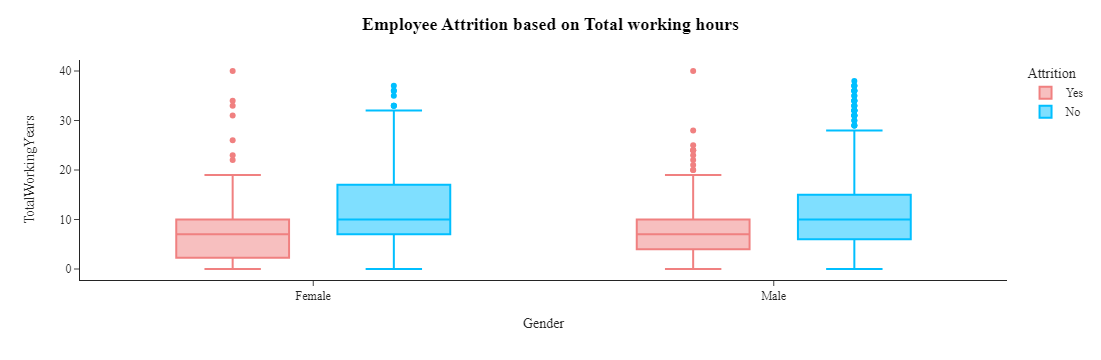

In [20]:
fig=px.box(df,x='Gender',y='TotalWorkingYears',color='Attrition',template='simple_white',color_discrete_sequence=['LightCoral','DeepSkyBlue'])
fig.update_xaxes(visible=True)
fig.update_yaxes(visible=True)
fig.update_layout(title_x=0.5,template='simple_white',showlegend=True,title_text='<b style="color:black; font-size:105%;">Employee Attrition based on Total working hours</b>',font_family="Times New Roman",title_font_family="Times New Roman")
fig.show()

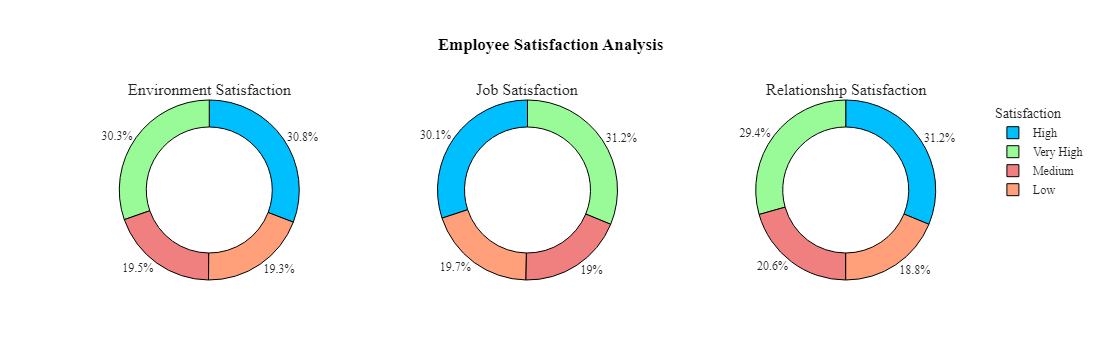

In [21]:
fig=go.Figure()
fig=make_subplots(rows=1,cols=2)
fig = make_subplots(rows=1, cols=3, specs=[[{"type": "pie"}, {"type": "pie"}, {"type": "pie"}]],subplot_titles=('Environment Satisfaction', 'Job Satisfaction','Relationship Satisfaction'))
fig.add_trace(go.Pie(values=df.groupby(['EnvironmentSatisfaction'],as_index=False)['Age'].count()['Age'],labels=df.groupby(['EnvironmentSatisfaction'],as_index=False)['Age'].count()['EnvironmentSatisfaction'],hole=0.7,marker_colors=['DeepSkyBlue','LightSalmon','LightCoral','PaleGreen'],name='Environment Satisfaction',showlegend=False),row=1,col=1)
fig.add_trace(go.Pie(values=df.groupby(['JobSatisfaction'],as_index=False)['Age'].count()['Age'],labels=df.groupby(['JobSatisfaction'],as_index=False)['Age'].count()['JobSatisfaction'],hole=0.7,marker_colors=['DeepSkyBlue','LightSalmon','LightCoral','PaleGreen'],name='Environment Satisfaction',showlegend=False),row=1,col=2)
fig.add_trace(go.Pie(values=df.groupby(['RelationshipSatisfaction'],as_index=False)['Age'].count()['Age'],labels=df.groupby(['RelationshipSatisfaction'],as_index=False)['Age'].count()['RelationshipSatisfaction'],hole=0.7,marker_colors=['DeepSkyBlue','LightSalmon','LightCoral','PaleGreen'],name='Relationship Satisfaction',showlegend=True),row=1,col=3)
fig.update_traces(textposition='outside', textinfo='percent')

fig.update_layout(title_x=0.5,template='simple_white',showlegend=True,legend_title_text="Satisfaction",title_text='<b style="color:black; font-size:100%;">Employee Satisfaction Analysis',font_family="Times New Roman",title_font_family="Times New Roman")
fig.update_traces(marker=dict(line=dict(color='#000000', width=1)))



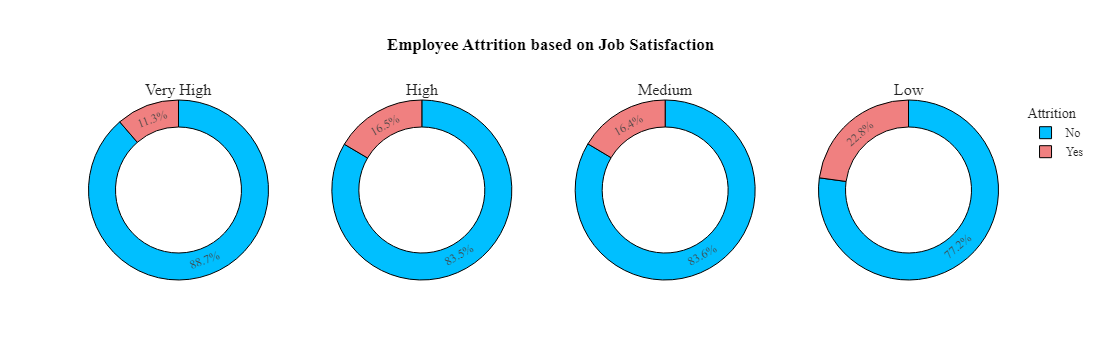

In [22]:
bus=df.groupby(['JobSatisfaction','Attrition'],as_index=False)['Age'].count()
bus.rename(columns={'Age':'Count'},inplace=True)
fig=go.Figure()
fig = make_subplots(rows=1, cols=4, specs=[[{"type": "pie"}, {"type": "pie"},{"type": "pie"}, {"type": "pie"}]],subplot_titles=('Very High', 'High','Medium','Low'))

fig.add_trace(go.Pie(values=bus[bus['JobSatisfaction']=='Very High']['Count'],labels=bus[bus['JobSatisfaction']=='Very High']['Attrition'],hole=0.7,marker_colors=['DeepSkyBlue','LightCoral'],name='Very High',showlegend=False),row=1,col=1)
fig.add_trace(go.Pie(values=bus[bus['JobSatisfaction']=='High']['Count'],labels=bus[bus['JobSatisfaction']=='High']['Attrition'],hole=0.7,marker_colors=['DeepSkyBlue','LightCoral'],name='High',showlegend=False),row=1,col=2)
fig.add_trace(go.Pie(values=bus[bus['JobSatisfaction']=='Medium']['Count'],labels=bus[bus['JobSatisfaction']=='Medium']['Attrition'],hole=0.7,marker_colors=['DeepSkyBlue','LightCoral'],name='Medium',showlegend=False),row=1,col=3)
fig.add_trace(go.Pie(values=bus[bus['JobSatisfaction']=='Low']['Count'],labels=bus[bus['JobSatisfaction']=='Low']['Attrition'],hole=0.7,marker_colors=['DeepSkyBlue','LightCoral'],name='Low',showlegend=True),row=1,col=4)

fig.update_layout(title_x=0.5,template='simple_white',showlegend=True,legend_title_text="Attrition",title_text='<b style="color:black; font-size:100%;">Employee Attrition based on Job Satisfaction',font_family="Times New Roman",title_font_family="Times New Roman")
fig.update_traces(marker=dict(line=dict(color='#000000', width=1)))




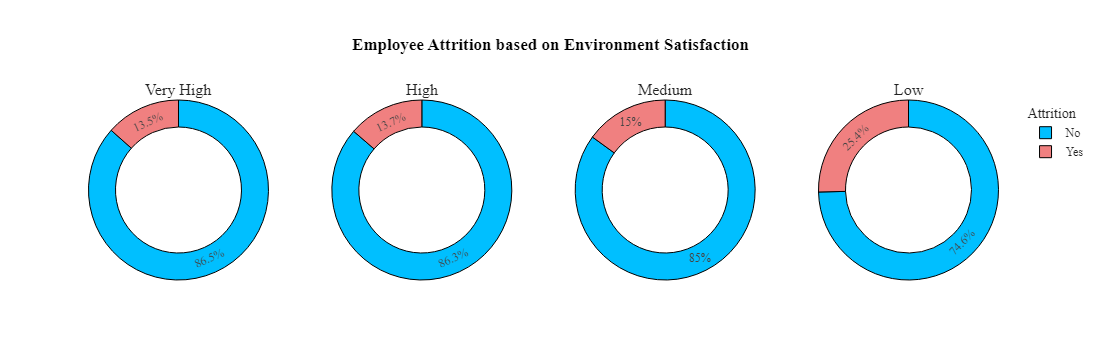

In [23]:
bus=df.groupby(['EnvironmentSatisfaction','Attrition'],as_index=False)['Age'].count()
bus.rename(columns={'Age':'Count'},inplace=True)
fig=go.Figure()
fig = make_subplots(rows=1, cols=4, specs=[[{"type": "pie"}, {"type": "pie"},{"type": "pie"}, {"type": "pie"}]],subplot_titles=('Very High', 'High','Medium','Low'))

fig.add_trace(go.Pie(values=bus[bus['EnvironmentSatisfaction']=='Very High']['Count'],labels=bus[bus['EnvironmentSatisfaction']=='Very High']['Attrition'],hole=0.7,marker_colors=['DeepSkyBlue','LightCoral'],name='Very High',showlegend=False),row=1,col=1)
fig.add_trace(go.Pie(values=bus[bus['EnvironmentSatisfaction']=='High']['Count'],labels=bus[bus['EnvironmentSatisfaction']=='High']['Attrition'],hole=0.7,marker_colors=['DeepSkyBlue','LightCoral'],name='High',showlegend=False),row=1,col=2)
fig.add_trace(go.Pie(values=bus[bus['EnvironmentSatisfaction']=='Medium']['Count'],labels=bus[bus['EnvironmentSatisfaction']=='Medium']['Attrition'],hole=0.7,marker_colors=['DeepSkyBlue','LightCoral'],name='Medium',showlegend=False),row=1,col=3)
fig.add_trace(go.Pie(values=bus[bus['EnvironmentSatisfaction']=='Low']['Count'],labels=bus[bus['EnvironmentSatisfaction']=='Low']['Attrition'],hole=0.7,marker_colors=['DeepSkyBlue','LightCoral'],name='Low',showlegend=True),row=1,col=4)

fig.update_layout(title_x=0.5,template='simple_white',showlegend=True,legend_title_text="Attrition",title_text='<b style="color:black; font-size:100%;">Employee Attrition based on Environment Satisfaction',font_family="Times New Roman",title_font_family="Times New Roman")
fig.update_traces(marker=dict(line=dict(color='#000000', width=1)))



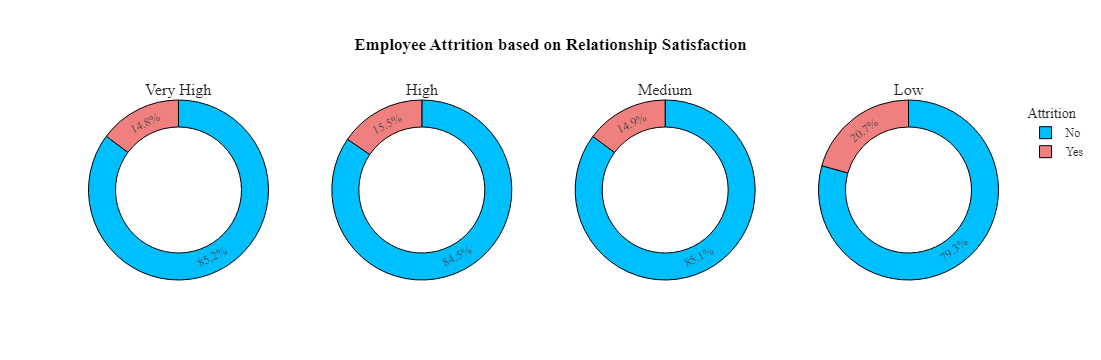

In [24]:
bus=df.groupby(['RelationshipSatisfaction','Attrition'],as_index=False)['Age'].count()
bus.rename(columns={'Age':'Count'},inplace=True)
fig=go.Figure()
fig = make_subplots(rows=1, cols=4, specs=[[{"type": "pie"}, {"type": "pie"},{"type": "pie"}, {"type": "pie"}]],subplot_titles=('Very High', 'High','Medium','Low'))

fig.add_trace(go.Pie(values=bus[bus['RelationshipSatisfaction']=='Very High']['Count'],labels=bus[bus['RelationshipSatisfaction']=='Very High']['Attrition'],hole=0.7,marker_colors=['DeepSkyBlue','LightCoral'],name='Very High',showlegend=False),row=1,col=1)
fig.add_trace(go.Pie(values=bus[bus['RelationshipSatisfaction']=='High']['Count'],labels=bus[bus['RelationshipSatisfaction']=='High']['Attrition'],hole=0.7,marker_colors=['DeepSkyBlue','LightCoral'],name='High',showlegend=False),row=1,col=2)
fig.add_trace(go.Pie(values=bus[bus['RelationshipSatisfaction']=='Medium']['Count'],labels=bus[bus['RelationshipSatisfaction']=='Medium']['Attrition'],hole=0.7,marker_colors=['DeepSkyBlue','LightCoral'],name='Medium',showlegend=False),row=1,col=3)
fig.add_trace(go.Pie(values=bus[bus['RelationshipSatisfaction']=='Low']['Count'],labels=bus[bus['RelationshipSatisfaction']=='Low']['Attrition'],hole=0.7,marker_colors=['DeepSkyBlue','LightCoral'],name='Low',showlegend=True),row=1,col=4)

fig.update_layout(title_x=0.5,template='simple_white',showlegend=True,legend_title_text="Attrition",title_text='<b style="color:black; font-size:100%;">Employee Attrition based on Relationship Satisfaction',font_family="Times New Roman",title_font_family="Times New Roman")
fig.update_traces(marker=dict(line=dict(color='#000000', width=1)))



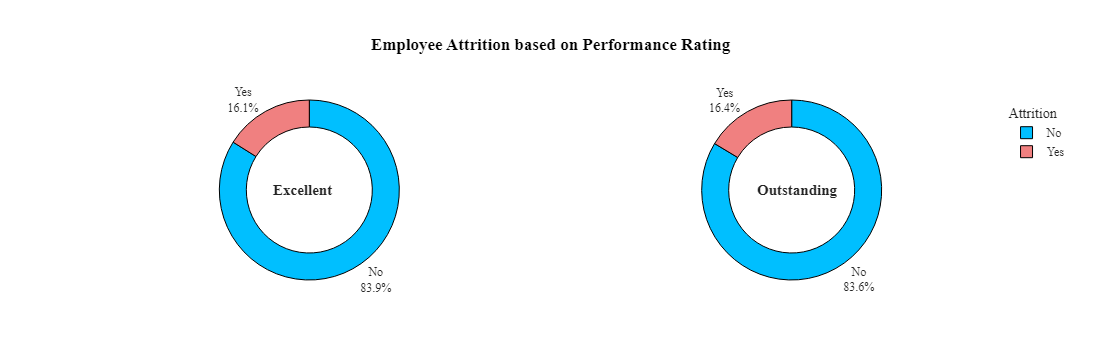

In [25]:
bus=df.groupby(['PerformanceRating','Attrition'],as_index=False)['Age'].count()
bus.rename(columns={'Age':'Count'},inplace=True)
fig=go.Figure()
fig = make_subplots(rows=1, cols=2, specs=[[{"type": "pie"}, {"type": "pie"}]])
fig.add_trace(go.Pie(values=bus[bus['PerformanceRating']=='Excellent']['Count'],labels=bus[bus['PerformanceRating']=='Excellent']['Attrition'],hole=0.7,marker_colors=['DeepSkyBlue','LightCoral'],name='Excellent',showlegend=False),row=1,col=1)
fig.add_trace(go.Pie(values=bus[bus['PerformanceRating']=='Outstanding']['Count'],labels=bus[bus['PerformanceRating']=='Outstanding']['Attrition'],hole=0.7,marker_colors=['DeepSkyBlue','LightCoral'],name='Outstanding',showlegend=True),row=1,col=2)
fig.add_annotation(dict(x=0.18, y=0.5,  align='center',
                        xref = "paper", yref = "paper",
                        showarrow = False, font_size=15,
                        text="<b>Excellent</b>"))
fig.add_annotation(dict(x=0.83, y=0.5,  align='center',
                        xref = "paper", yref = "paper",
                        showarrow = False, font_size=15,
                        text="<b>Outstanding</b>"))
fig.update_traces(textposition='outside', textinfo='percent+label')
fig.update_layout(title_x=0.5,template='simple_white',showlegend=True,legend_title_text="Attrition",title_text='<b style="color:black; font-size:100%;">Employee Attrition based on Performance Rating',font_family="Times New Roman",title_font_family="Times New Roman")
fig.update_traces(marker=dict(line=dict(color='#000000', width=1)))



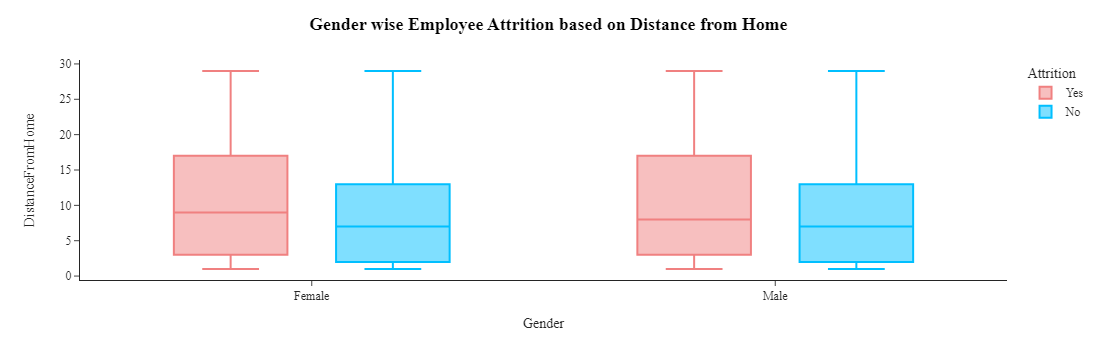

In [26]:
fig=px.box(df,x='Gender',y='DistanceFromHome',color='Attrition',template='simple_white',color_discrete_sequence=['LightCoral','DeepSkyBlue'])
fig.update_xaxes(visible=True)
fig.update_yaxes(visible=True)
fig.update_layout(title_x=0.5,template='simple_white',showlegend=True,title_text='<b style="color:black; font-size:105%;">Gender wise Employee Attrition based on Distance from Home </b>',font_family="Times New Roman",title_font_family="Times New Roman")
fig.show()

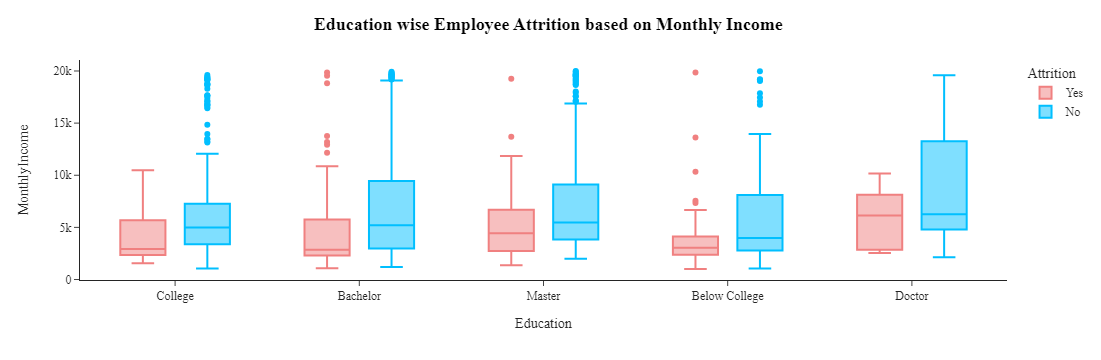

In [27]:
fig=px.box(df,x='Education',y='MonthlyIncome',color='Attrition',template='simple_white',color_discrete_sequence=['LightCoral','DeepSkyBlue'])
fig.update_xaxes(visible=True)
fig.update_yaxes(visible=True)
fig.update_layout(title_x=0.5,template='simple_white',showlegend=True,title_text='<b style="color:black; font-size:105%;">Education wise Employee Attrition based on Monthly Income </b>',font_family="Times New Roman",title_font_family="Times New Roman")
fig.show()

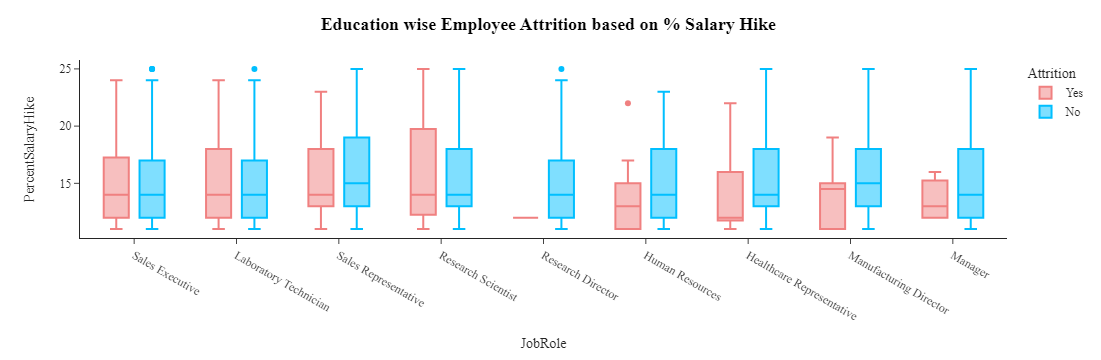

In [28]:
fig=px.box(df,x='JobRole',y='PercentSalaryHike',color='Attrition',color_discrete_sequence=['LightCoral','DeepSkyBlue'],template='simple_white')
fig.update_xaxes(visible=True)
fig.update_yaxes(visible=True)
fig.update_layout(title_x=0.5,template='simple_white',showlegend=True,title_text='<b style="color:black; font-size:105%;">Education wise Employee Attrition based on % Salary Hike </b>',font_family="Times New Roman",title_font_family="Times New Roman")
fig.show()

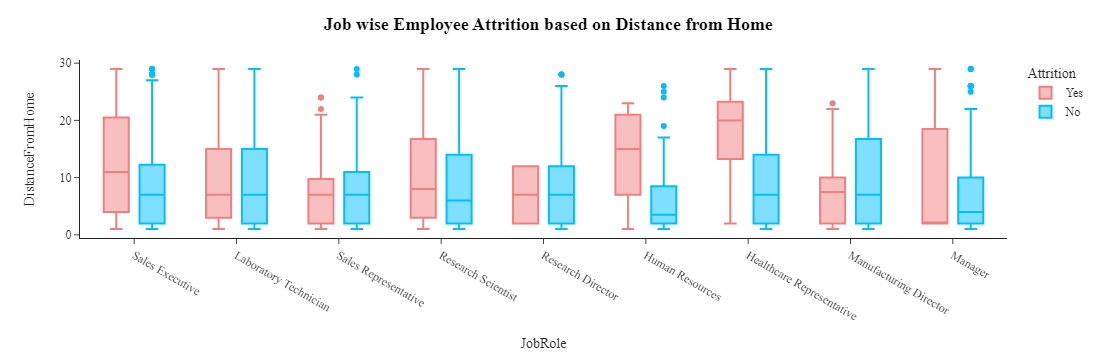

In [29]:
fig=px.box(df,x='JobRole',y='DistanceFromHome',color='Attrition',template='simple_white',color_discrete_sequence=['LightCoral','DeepSkyBlue'])
fig.update_xaxes(visible=True)
fig.update_yaxes(visible=True)
fig.update_layout(title_x=0.5,template='simple_white',showlegend=True,title_text='<b style="color:black; font-size:105%;">Job wise Employee Attrition based on Distance from Home </b>',font_family="Times New Roman",title_font_family="Times New Roman")
fig.show()